In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from PIL import Image, ImageOps
import tikzplotlib


In [7]:
boost5050 = np.load('../data/boost5050.npy')
bestc_boost , worstc_boost = np.load("bestc_boost.npy"), np.load("worstc_boost.npy")
nb_novel_class =20


FileNotFoundError: [Errno 2] No such file or directory: '../data/boost5050.npy'

In [4]:
plt.figure(figsize=(15,15))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})

#boost5050[1,10]= 20
plt.imshow(boost5050.T,aspect='auto')
shift_x, shift_y = -0.25, 0.25

for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if k<l:
            plt.text(k+shift_x,l+shift_y,str(bestc_boost[k,l]))
        elif k>l:
            plt.text(k+shift_x,l+shift_y,str(worstc_boost[k,l]))
        else:
            pass
        
       
#plt.text(1,10,'hello')
plt.colorbar()
plt.xticks(np.arange(0, nb_novel_class, 1))
plt.yticks(np.arange(0, nb_novel_class, 1))

plt.xlabel('Classe nouvelle A')
plt.ylabel('Classe nouvelle B')
plt.savefig('boost5050.pdf')
#tikzplotlib.save("Best.tikz")

plt.title('5050boost')

NameError: name 'boost5050' is not defined

<Figure size 1080x1080 with 0 Axes>

In [5]:
filenametrain = '/home/r21lafar/Documents/dataset/miniimagenetimages/train.csv'
filenametest = '/home/r21lafar/Documents/dataset/miniimagenetimages/test.csv'
filenameval = '/home/r21lafar/Documents/dataset/miniimagenetimages/validation.csv'
directory = '/home/r21lafar/Documents/dataset/miniimagenetimages/images/'

def opencsv(filename):
    file = open(filename)
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    print(header)
    rowstrain = []
    rows = []
    for row in csvreader:
        rows.append(row)
    return rows

test = opencsv(filenametest)
train = opencsv(filenametrain)
val = opencsv(filenameval)

def get_image(cl,idx=0):
    if cl<64:
        src=train
    elif cl>=80:
        src = test
        cl-=80
    else:
        src = val
        cl-=64
    idx=int((cl+0.5)*600)+idx
    filename=src[idx][0]
    im = Image.open(directory +filename)
    return im


['filename', 'label']
['filename', 'label']
['filename', 'label']


In [6]:
Goodid0 = [3,6,11,12,20,23,24,31,36,47,49,50,52,59,60,63,80,85,91,93,96,99]
Goodid1 = [0,35,41,44,45,53,54,56,57,58,62,81,83,84,90,92,94,95,98]
Goodid2 = [1,4,5,7,8,13,16,18,22,25,27,30,32,33,34,38,39,42,46,61,82,86,87,89]
Goodid3 = [10,26,28,29,40]
Goodid4 = [9,17,19,21,43,48,51,88,97]
Goodid5  = [55]
Goodid6 = [15,37]
Goodid7 =[2,14]

In [6]:
def find_good_index(cl):
    idx = (cl in Goodid0)*0 + (cl in Goodid1)*1+(cl in Goodid2)*2+(cl in Goodid3)*3+(cl in Goodid4)*4+(cl in Goodid5)*5+(cl in Goodid6)*6+(cl in Goodid7)*7
    return idx

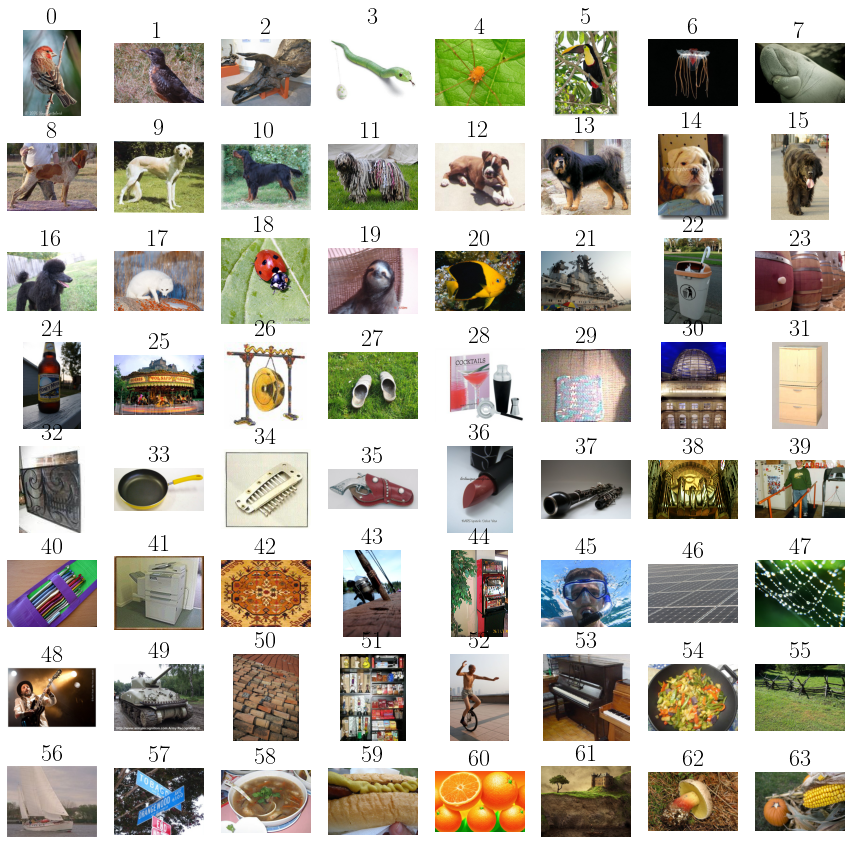

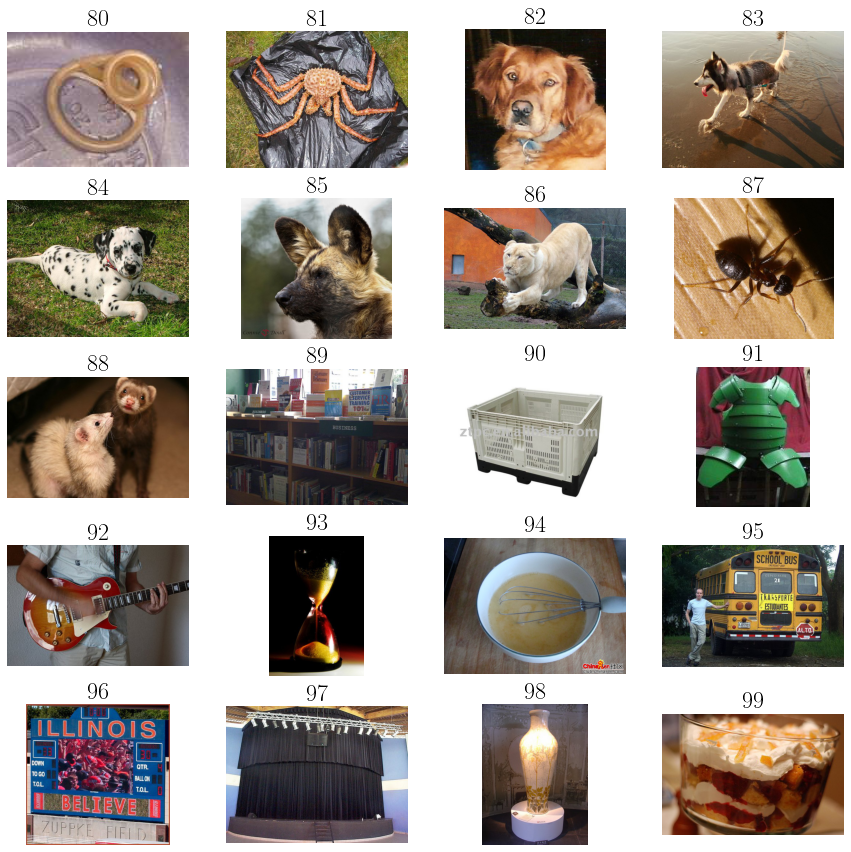

In [8]:
plt.figure(figsize = (15,15))

for i in range(64):
    idx = find_good_index(i)
    im = get_image(i,idx)
    plt.subplot(8,8,i+1)
    plt.imshow(im)
    plt.title(str(i))
    plt.axis('off')

plt.figure(figsize = (15,15))

for i in range(20):
    idx = find_good_index(i+80)
    im = get_image(i+80,idx)
    plt.subplot(5,4,i+1)
    plt.imshow(im)
    plt.title(str(i+80))
    plt.axis('off')

In [9]:
def crop_im(im):
    width, height = im.size   # Get dimensions
    new_width,new_height = min([width, height]),min([width, height])
    left = (width - new_width)/2
    top = (height - new_height)/2
    right = (width + new_width)/2
    bottom = (height + new_height)/2

    # Crop the center of the image
    im = im.crop((left, top, right, bottom))
    return im

/tmp/ipykernel_19660/3524039454.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


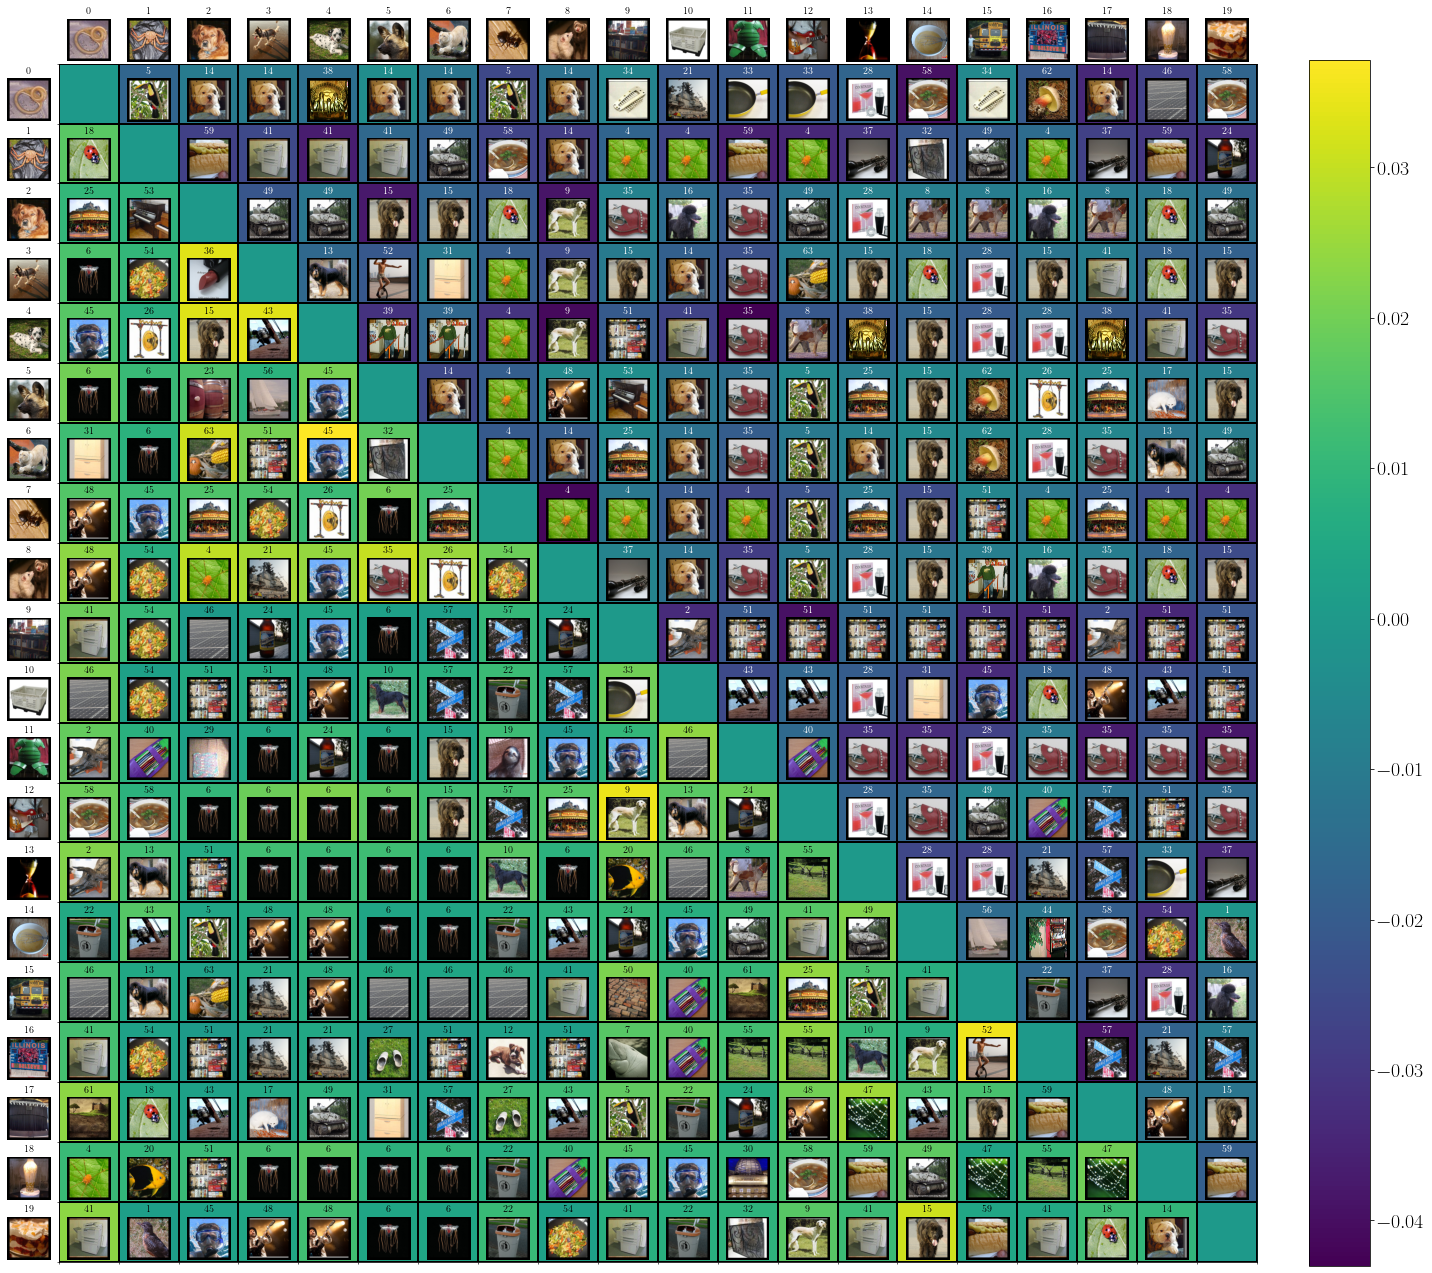

In [58]:
fig, ax = plt.subplots(figsize = (20,20))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})
#boost5050[1,10]= 20
img = ax.imshow(boost5050.T,aspect='equal')
shift_x, shift_y = -0.25, 0.25
ax.set_xticks(np.arange(-.5, nb_novel_class, 1), minor=True)
ax.set_yticks(np.arange(-.5, nb_novel_class, 1), minor=True)
ax.set_xticks([], minor=False)
ax.set_yticks([], minor=False)
ax.xaxis.set_ticklabels([])
# For Y-axis
ax.yaxis.set_ticklabels([])
# Gridlines based on minor ticks
ax.grid(which='minor', color='k', linestyle='-', linewidth=2)
plt.colorbar(img, ax=ax,fraction=0.046, pad=0.04)


#ax.set_xlabel('Classe nouvelle A')
#ax.set_ylabel('Classe nouvelle B')
width, height = 0.03,0.03
scalex,scaley=0.04*1.04,0.04*1.04
shiftx,shifty = 0.042,0.080
shifty = shifty +nb_novel_class*scaley
shifty-=scaley
for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if k<l:
            i= bestc_boost[k,l]
            show =True
            
        elif k>l:
            i= worstc_boost[k,l]
            show= True
        else:
            show =False
        if show:    
            idx = find_good_index(i)
            im = get_image(i,idx)
            im= crop_im(im)
            border=int(im.size[0]/15)
            im = ImageOps.expand(im, border = border)
            newax = fig.add_axes([shiftx+k*scalex, shifty-l*scaley, width, height] )
            newax.imshow(im)
            newax.axis('off')

        
shiftx-=scalex


for k in range(nb_novel_class):
        
        idx = find_good_index(k+80)
        im = get_image(k+80,idx)
        im= crop_im(im)
        border=int(im.size[0]/15)
        im = ImageOps.expand(im, border = border)
        newax = fig.add_axes([shiftx, shifty-k*scaley, width, height] )
        newax.imshow(im)
        newax.axis('off')

        
shiftx =shiftx+scalex
shifty = shifty-(nb_novel_class)*scaley
for k in range(nb_novel_class):
        
        idx = find_good_index(k+80)
        im = get_image(k+80,idx)
        im= crop_im(im)
        border=int(im.size[0]/15)
        im = ImageOps.expand(im, border = border)
        newax = fig.add_axes([shiftx+k*scalex, (nb_novel_class+1)*scaley+shifty, width, height] )
        newax.imshow(im)
        newax.axis('off')
        

        
shift_x, shift_y =0, -0.33
ft = 10
for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if k<l:
            ax.text(k+shift_x,l+shift_y,str(bestc_boost[k,l]), fontsize = ft,ha='center',)
        elif k>l:
            ax.text(k+shift_x,l+shift_y,str(worstc_boost[k,l]), fontsize =ft,ha='center',c='w')
        else:
            pass

for k in range(nb_novel_class):
    ax.text(-1+shift_x,k+shift_y,str(k),fontsize = ft,ha='center',)
  
    ax.text(k+shift_x+len(str(k))*shift_x,-1+shift_y,str(k),fontsize = ft,ha='center')
fig.tight_layout()

ax.figure.savefig('boost5050_w_img_ty.pdf')
#tikzplotlib.save('boost5050_w_img.tikz')